## **Bivariate Analysis**

Explore relationships between pairs of variables using scatter plots, correlation matrices, heatmaps, etc.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [32]:
# Functions

def read_data(data_path: str) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")    


def scatter_plot(data: pd.DataFrame, x: str, fig_size: tuple, y: str, palette: str='deep', save: bool=True):
    """
    This function creates a scatter plot
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(data=data, x=x, y=y, palette=palette)

    # Save plot
    if save:
        folder_name = 'bivariate_analysis_plots'
        file_name = f'{x.strip()}_scatter_plot.png'   
        save_plot(folder_name, file_name)

    plt.show()

In [4]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"

# Read the data
data = read_data(file_path)
print(f"Successfully read {len(data.columns)} features")

Successfully read 87 features


Bivariate analysis has to be done on important features to find out relations between certain features in the dataset

**Analysis**

In [10]:
# Lets separate the num and cat columns

# code
numerical_columns = data.select_dtypes(include='number')
categorical_columns = data.select_dtypes(exclude=['number'])

# print 
print(f"Numerical features: {numerical_columns.columns}")
print(f"Categorical features: {categorical_columns.columns}")

Numerical features: Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', '

In [18]:
# lets drop the categorical columns excluding Timestamp
# add timestamp column to numerical columns 
# code
numerical_columns['Timestamp'] = data['Timestamp']
# numerical_columns.columns

In [16]:
# Copy DataFrame to data
data = numerical_columns 

C:\Users\91790\AppData\Local\Temp\ipykernel_4172\1460431474.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, palette=palette)


Fig saved successfully!


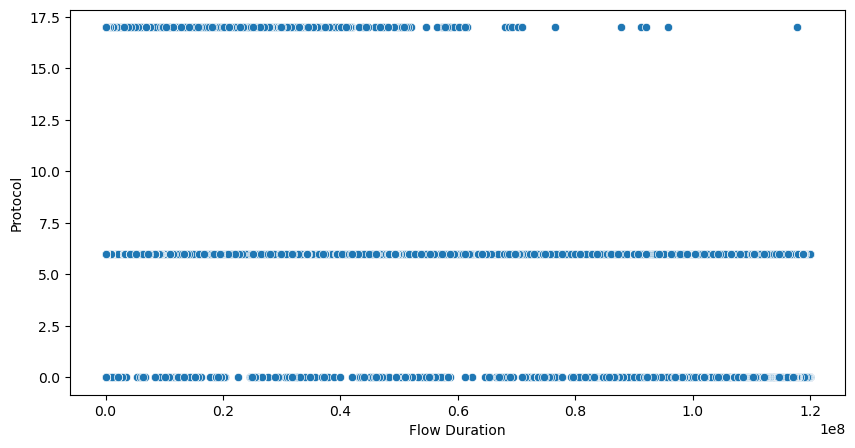

In [33]:
#  Feature: Flow Duration and Protocol 
# scatter plot 
scatter_plot(data=data, x='Flow Duration', y='Protocol', save=True, fig_size=(10, 5)) 

Fig saved successfully!


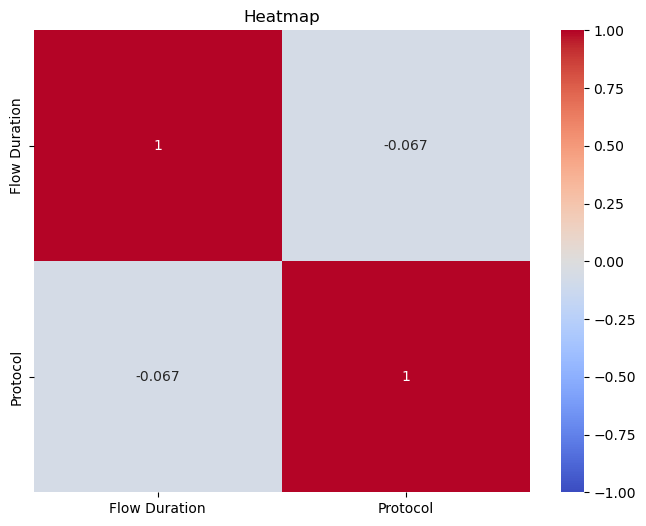

In [37]:
# Heatmap
# Calculate the correlation matrix for the two features
correlation = data[['Flow Duration', 'Protocol']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap")
save_plot(folder_name='bivariate_analysis_plots', file_name='FlowDurationVsProtocol.png')
plt.show()

- The correlation between "Flow Duration" and "Protocol" is -0.067, which is very close to zero.
- This indicates a very weak negative correlation between these two columns.

C:\Users\91790\AppData\Local\Temp\ipykernel_4172\1460431474.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, palette=palette)


Fig saved successfully!


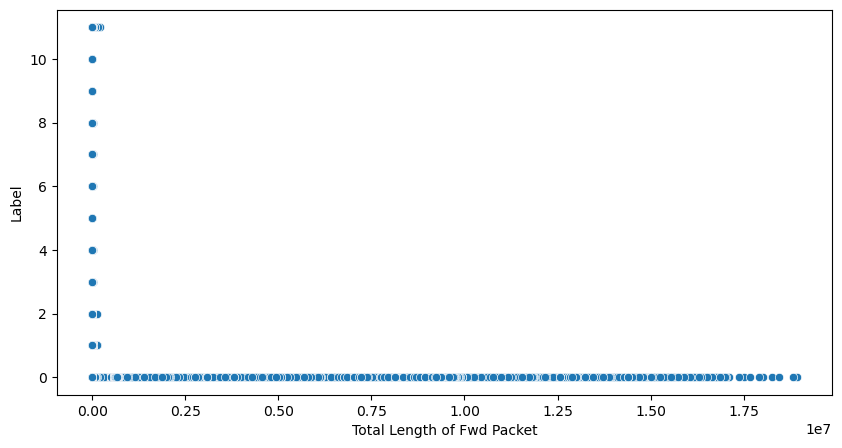

In [39]:
# Feature: Total length of Fwd Packet, 'Label'
# scatter plot
scatter_plot(data=data, x='Total Length of Fwd Packet', y='Label', save=True, fig_size=(10, 5))

Fig saved successfully!


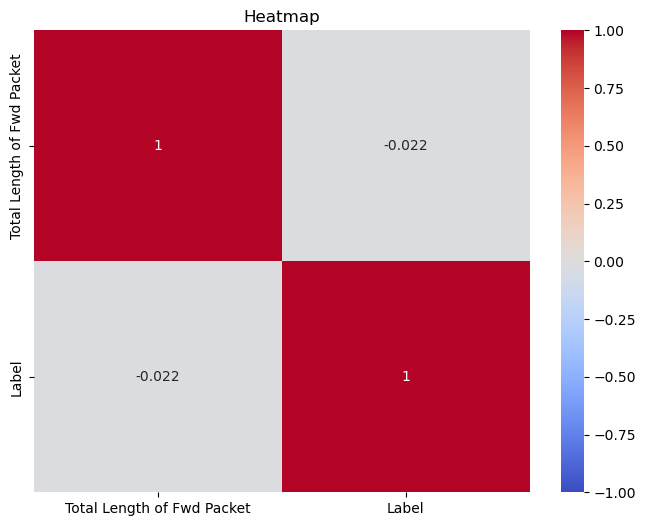

In [40]:
# Heatmap
# Calculate the correlation matrix for the two features
correlation = data[['Total Length of Fwd Packet', 'Label']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap")
save_plot(folder_name='bivariate_analysis_plots', file_name='TotalLengthOfFwdPacket_vs_Label.png')
plt.show()

- Negative weak correlation

Fig saved successfully!


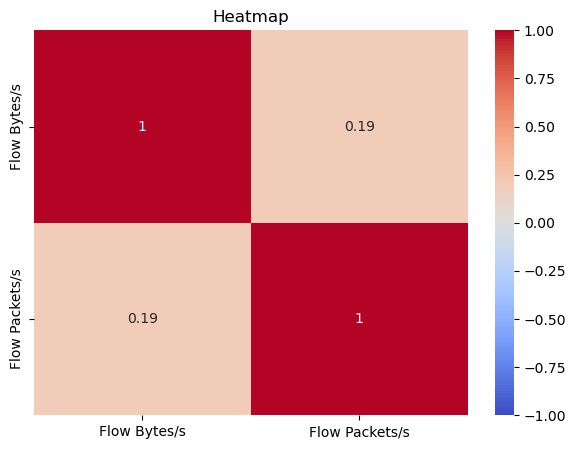

In [42]:
# Features: Flow Bytes/s, Flow Packets/s
# Heatmap 
# Calculate the correlation matrix for the two features
correlation = data[['Flow Bytes/s', 'Flow Packets/s']].corr()

# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap")
save_plot(folder_name='bivariate_analysis_plots', file_name='FlowBytes_vs_FlowPackets.png')
plt.show()

- Weak Positive correlation

Fig saved successfully!


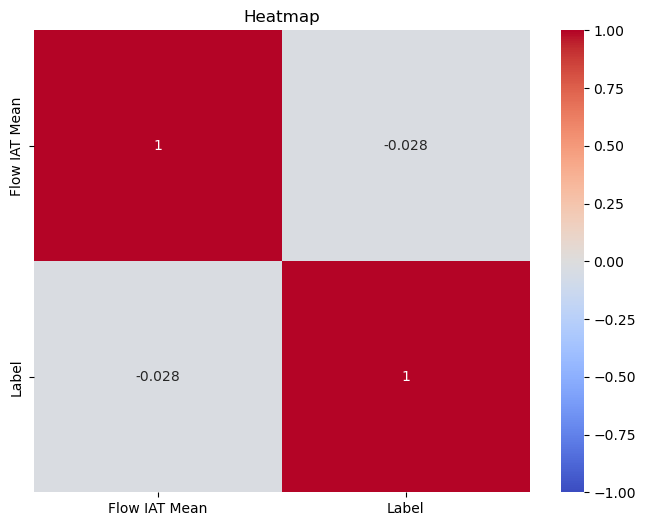

In [44]:
# Feature: Flow IAT MEan, Label
# heatmap
# Calculate the correlation matrix for the two features
correlation = data[['Flow IAT Mean', 'Label']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap")
save_plot(folder_name='bivariate_analysis_plots', file_name='FlowIATMean_vs_Label.png')
plt.show()

- Weak negative correlation

Fig saved successfully!


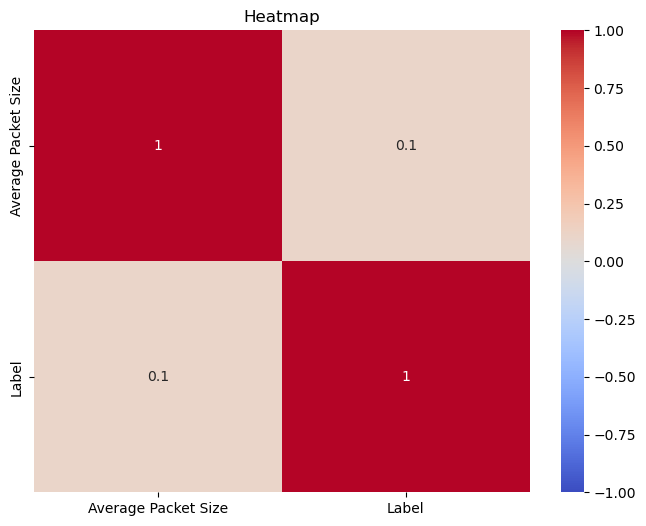

In [46]:
# Feature: Average Packet Size, label
# Calculate the correlation matrix for the two features
correlation = data[['Average Packet Size', 'Label']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap")
save_plot(folder_name='bivariate_analysis_plots', file_name='AveragePacketSize_vs_Label.png')
plt.show()

- Some correlation 